**• DOMAIN:** 
Digital content and entertainment industry

**• CONTEXT:** The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The
model uses a complex deep learning model to build an embedding layer followed by
a classification algorithm to analyse the sentiment of the customers.

**• DATA DESCRIPTION:** The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

**• PROJECT OBJECTIVE:** Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

**Steps and tasks:** [ Total Score: 30 points]
1. Import and analyse the data set.

Hint: - Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words
2. Perform relevant sequence adding on the data
3. Perform following data analysis:
• Print shape of features and labels
• Print value of any one feature and it's label
4. Decode the feature value to get original sentence
5. Design, train, tune and test a sequential model.
Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN
classifiers. Be analytical and experimental here in trying new approaches to design the best model.
6. Use the designed model to print the prediction on any one sample.

### Import and analyse the data set.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 147 µs (started: 2021-11-21 15:52:32 +00:00)


### Get train and test set and Take 10000 most frequent words

Importing required libraries and loading the inbuilt dataset from tensorflow as mentioned in the hint

In [3]:
import tensorflow as tf
import numpy as np

desired_vocab_size=10000
INDEX_FROM=3
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=desired_vocab_size,skip_top = INDEX_FROM, seed=42)

time: 7.27 s (started: 2021-11-21 15:52:32 +00:00)


In the dataset provided, we shall split the dataset in 4 parts. Unseen data will be used for final comparison of prediction and actual value. Train data is used to train the model and validation dataset is used to validate the model. Test data is used to find the overal accuracy of the model.

In [4]:
X_unseen_data = X_test[24950:]
y_unseen_data = y_test[24950:]

X_train = np.concatenate((X_train, X_test[0:10000]),axis=0)
y_train = np.concatenate((y_train, y_test[0:10000]),axis=0)

X_val = X_test[10000:20000]
y_val = y_test[10000:20000]

X_test = X_test[20000:24950]
y_test = y_test[20000:24950]

time: 4.88 ms (started: 2021-11-21 15:52:40 +00:00)


Checking the data type and shape of the dataset

In [5]:
print("X train type : ", type(X_train), " X train shape : ", X_train.shape , "y train type : ", type(y_train), " y train shape : ", y_train.shape)
print("X val type : ", type(X_val), " X val shape : ", X_val.shape , "y val type : ", type(y_val), " y val shape : ", y_val.shape)

print("X test type : ", type(X_test), " X test shape : ", X_test.shape , "y test type : ", type(y_test), " y train shape : ", y_test.shape)
print("X unseen_data type : ", type(X_unseen_data), " X unseen_data shape : ", X_unseen_data.shape , "y unseen_data type : ", type(y_unseen_data), " y unseen_data shape : ", y_unseen_data.shape)

X train type :  <class 'numpy.ndarray'>  X train shape :  (35000,) y train type :  <class 'numpy.ndarray'>  y train shape :  (35000,)
X val type :  <class 'numpy.ndarray'>  X val shape :  (10000,) y val type :  <class 'numpy.ndarray'>  y val shape :  (10000,)
X test type :  <class 'numpy.ndarray'>  X test shape :  (4950,) y test type :  <class 'numpy.ndarray'>  y train shape :  (4950,)
X unseen_data type :  <class 'numpy.ndarray'>  X unseen_data shape :  (50,) y unseen_data type :  <class 'numpy.ndarray'>  y unseen_data shape :  (50,)
time: 5.59 ms (started: 2021-11-21 15:52:40 +00:00)


Check random record in the dataset

In [6]:
print("10th X_train data :: " ,  X_train[10])
print("10th y_train data (label) :: " ,  y_train[10])

10th X_train data ::  [2, 24, 31, 7, 6813, 118, 2048, 14, 16, 382, 6, 2, 589, 8, 1060, 309, 23, 4, 223, 29, 1021, 83, 4, 2, 6, 6713, 631, 1101, 2, 5, 6, 201, 7, 2, 832, 5325, 83, 6, 1349, 19, 6, 1058, 2531, 255, 37, 367, 19, 41, 336, 5, 1094, 1694, 90, 2, 366, 36, 104, 29, 203, 30, 35, 9077, 8, 6, 3200, 4074, 8681, 7138, 133, 1994, 26, 270, 56, 5, 21, 18, 4, 293, 1854, 8, 990, 125, 10, 10, 14, 2, 346, 127, 28, 33, 222, 107, 147, 919, 2, 4519, 1587, 187, 27, 583, 7, 3068, 34, 772, 4, 2, 23, 4, 1513, 5, 4, 1121, 5485, 7, 27, 5374, 223, 8, 1227, 721, 4, 3549, 8, 27, 7479, 4, 85, 9, 6, 223, 4883, 19, 4, 436, 604, 1364, 2, 8, 4, 1873, 17, 4, 2, 7, 4, 370, 1978, 94, 2, 10, 10, 4, 2, 3640, 2, 100, 28, 77, 4, 2, 18, 6, 2557, 201, 7, 1994, 2171, 725, 1994, 21, 3003, 346, 18, 32, 4, 2, 7, 943, 10, 10, 2, 2492, 9, 6364, 5, 788, 5, 4, 603, 9, 31, 18, 1799, 3654, 9397, 5, 481, 302, 24, 31, 7, 2, 118, 2048, 21, 290, 6, 171, 919]
10th y_train data (label) ::  0
time: 1.2 ms (started: 2021-11-21 15:52

Get indices for words from the IMDB dataset and print random train data.

In [7]:
word_to_id = tf.keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in X_train[1542] ))

<UNK> i have a feeling that the <UNK> bros depression era musicals are going to become a lot more <UNK> in the next couple of years yes we are in the economic <UNK> or have you been living under a rock and times look bleak but we always have the movies as a way to escape our troubles in the 30's film going was hugely popular even at the height of economic <UNK> <UNK> parade 1933 was one such film that audiences <UNK> to while this lloyd bacon directed musical doesn't quite capture the social issues of the time as gold <UNK> of 1933 1933 does it's still a wonderful showcase of talent we have to wait until the end of the film for the three <UNK> busby <UNK> <UNK> numbers but boy are they worth waiting for me yes little ruby keeler is a terrible singer and actress and her <UNK> is so so but <UNK> magical by a <UNK> <UNK> her and what seems to be a hundred other chorus girls into a <UNK> water wonderland of course <UNK> numbers could never really be performed on a stage they defy limits of

printing first 5000 word in the word_to_id items

In [8]:
print(word_to_id.items())
ii=0
for word, i in sorted(word_to_id.items(),key=lambda x:x[1]):
  if(ii<5000):
    print(word, " :: ", i)
    ii=ii+1

Streaming output truncated to the last 5000 lines.
<START>  ::  1
<UNK>  ::  2
<UNUSED>  ::  3
the  ::  4
and  ::  5
a  ::  6
of  ::  7
to  ::  8
is  ::  9
br  ::  10
in  ::  11
it  ::  12
i  ::  13
this  ::  14
that  ::  15
was  ::  16
as  ::  17
for  ::  18
with  ::  19
movie  ::  20
but  ::  21
film  ::  22
on  ::  23
not  ::  24
you  ::  25
are  ::  26
his  ::  27
have  ::  28
he  ::  29
be  ::  30
one  ::  31
all  ::  32
at  ::  33
by  ::  34
an  ::  35
they  ::  36
who  ::  37
so  ::  38
from  ::  39
like  ::  40
her  ::  41
or  ::  42
just  ::  43
about  ::  44
it's  ::  45
out  ::  46
has  ::  47
if  ::  48
some  ::  49
there  ::  50
what  ::  51
good  ::  52
more  ::  53
when  ::  54
very  ::  55
up  ::  56
no  ::  57
time  ::  58
she  ::  59
even  ::  60
my  ::  61
would  ::  62
which  ::  63
only  ::  64
story  ::  65
really  ::  66
see  ::  67
their  ::  68
had  ::  69
can  ::  70
were  ::  71
me  ::  72
well  ::  73
than  ::  74
we  ::  75
much  ::  76
been  ::  77
bad  ::

'the', 'and' , 'a' are most frequent used words. Here we are not using stopwords to remove the words from the sentences. These words will carry meaning to the sentiments and hence will not be removed before processing.

### Perform relevant sequence adding on the data

Adding padding to the data with maximum length of 300. Here we are pre padding the words and truncating the words in sentences which are having more the 300 word length

In [9]:
#Define maximum number of words to consider in each review
max_review_length = 300

#Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        maxlen=max_review_length,
                                                        padding='pre', 
                                                        truncating='post')

X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, 
                                                       maxlen=max_review_length, 
                                                       padding='pre',
                                                       truncating='post')


X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, 
                                                       maxlen=max_review_length, 
                                                       padding='pre',
                                                       truncating='post')

X_unseen_data = tf.keras.preprocessing.sequence.pad_sequences(X_unseen_data, 
                                                       maxlen=max_review_length, 
                                                       padding='pre',
                                                       truncating='post')

time: 1.78 s (started: 2021-11-21 15:52:41 +00:00)


### Design, train, tune and test a sequential model.

We are building the model with simple LSTM layer and dense layer as sigmoid for the output since it is a binary classification and we are using binary_crossentropy as loss.

In [10]:
#Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

time: 803 ms (started: 2021-11-21 15:52:43 +00:00)


Here we are generating the embedding with size of 50 for each review. Here the embedding layer will be trained and hence we will see more number of parameters to be trained

In [11]:
model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    50, #Embedding size
                                    input_length=max_review_length) #Number of words in each review
          )
model.output

<KerasTensor: shape=(None, 300, 50) dtype=float32 (created by layer 'embedding')>

time: 75.3 ms (started: 2021-11-21 15:52:44 +00:00)


define dropout and LSTM. LSTM size of cell and hidden state of 128.

In [12]:
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(128)) #RNN State - size of cell state and hidden state

time: 1.5 s (started: 2021-11-21 15:52:44 +00:00)


In [13]:
model.output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'lstm')>

time: 6.19 ms (started: 2021-11-21 15:52:46 +00:00)


using sigmoid as activation function. This is the output layer.

In [14]:
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

time: 30.6 ms (started: 2021-11-21 15:52:46 +00:00)


In [15]:
#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

time: 25.4 ms (started: 2021-11-21 15:52:46 +00:00)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           500050    
                                                                 
 dropout (Dropout)           (None, 300, 50)           0         
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 591,827
Trainable params: 591,827
Non-trainable params: 0
_________________________________________________________________
time: 2.4 ms (started: 2021-11-21 15:52:46 +00:00)


As we can observe, the number of Non-trainable params are 0 and we there are more number of parameters (weights and biases). Most number fo parameters are in emdedding layer when compare with LSTM layer.

In [17]:
history_manual_emdb = model.fit(X_train,y_train,
          epochs=10,
          batch_size=32,          
          validation_data=(X_val, y_val))

Epoch 1/10
1094/1094 [==============================] - 27s 21ms/step - loss: 0.4418 - accuracy: 0.7973 - val_loss: 0.3980 - val_accuracy: 0.8322
Epoch 2/10
1094/1094 [==============================] - 22s 20ms/step - loss: 0.2882 - accuracy: 0.8874 - val_loss: 0.3378 - val_accuracy: 0.8597
Epoch 3/10
1094/1094 [==============================] - 22s 20ms/step - loss: 0.2319 - accuracy: 0.9108 - val_loss: 0.3190 - val_accuracy: 0.8776
Epoch 4/10
1094/1094 [==============================] - 22s 20ms/step - loss: 0.1796 - accuracy: 0.9345 - val_loss: 0.3428 - val_accuracy: 0.8688
Epoch 5/10
1094/1094 [==============================] - 22s 20ms/step - loss: 0.1529 - accuracy: 0.9437 - val_loss: 0.4300 - val_accuracy: 0.8650
Epoch 6/10
1094/1094 [==============================] - 22s 20ms/step - loss: 0.1254 - accuracy: 0.9548 - val_loss: 0.4871 - val_accuracy: 0.8429
Epoch 7/10
1094/1094 [==============================] - 22s 20ms/step - loss: 0.1144 - accuracy: 0.9583 - val_loss: 0.4239 -

In [18]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.82%
time: 1.16 s (started: 2021-11-21 15:57:12 +00:00)


As observed in above cell, the ovrall accuracy is around 85% for the test data. Although the model is having high accuracy on the train data, it may be a over fit model since the test accuracy is way below the train accuracy and the same is with validation accuracy.

Checking model performance using the graphs

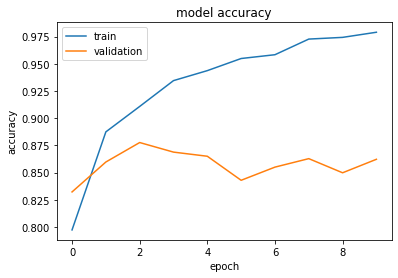

time: 226 ms (started: 2021-11-21 15:57:13 +00:00)


In [19]:
import matplotlib.pyplot as plt
plt.plot(history_manual_emdb.history['accuracy'])
plt.plot(history_manual_emdb.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

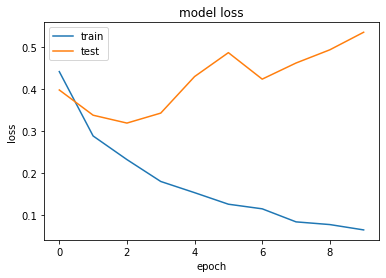

time: 171 ms (started: 2021-11-21 15:57:13 +00:00)


In [20]:
# summarize history for loss
plt.plot(history_manual_emdb.history['loss'])
plt.plot(history_manual_emdb.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The above model is a over fitting model as it is having large gap between validation and train accuracy and loss. As observed the gap is widening.

We can plan to use pre-trained embedding like Glove. GloVe stands for “Global Vectors”. And as mentioned earlier, GloVe captures both global statistics and local statistics of a corpus, in order to come up with word vectors. GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors.


using gensim library and load the glove embedding. The basic idea behind the GloVe word embedding is to derive the relationship between the words from statistics. Unlike the occurrence matrix, the co-occurrence matrix tells you how often a particular word pair occurs together. Each value in the co-occurrence matrix represents a pair of words occurring together.

In [21]:
import gensim.downloader as api
import numpy as np
#Load Glove model (similar to Word2Vec)
glove_model = api.load('glove-wiki-gigaword-50')
#Size of the model
glove_model.vectors.shape
#Initialize embedding matrix for our dataset with 10000+1 rows (1 for padding word)
#and 50 columns (as embedding size is 50)
embedding_matrix = np.zeros((desired_vocab_size + 1, 50))

[==================================================] 100.0% 66.0/66.0MB downloaded
time: 47.6 s (started: 2021-11-21 15:57:13 +00:00)


comparing the IMDB words with the global embedding and developing the embeding vector.

In [22]:
for word, i in sorted(word_to_id.items(),key=lambda x:x[1]):
    if i > (desired_vocab_size+1):
        break
    try:
        embedding_vector = glove_model[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
        pass

time: 79.5 ms (started: 2021-11-21 15:58:01 +00:00)


Checking random embedding matrix

In [23]:
embedding_matrix[200]

array([ 0.75029999,  0.71622998, -0.27033001,  0.20059   , -0.17008001,
        0.68567997, -0.061672  , -0.054638  , -0.86404002, -0.61395001,
       -0.11047   , -0.38826999, -0.65705001, -0.51993001, -0.11222   ,
        0.35218   , -0.062404  , -0.1367    , -0.74921   ,  0.29495999,
        0.64600003, -0.045973  ,  0.67606997,  0.43915001, -0.11932   ,
       -1.25650001,  0.61852998, -0.057893  ,  0.11771   ,  0.45168999,
        3.8217001 ,  0.19942001, -0.30559999, -0.3612    ,  0.16007   ,
       -0.62273997, -0.83082998, -0.032579  , -0.48379999,  0.60626   ,
       -0.22847   , -0.073889  ,  0.052593  ,  0.039626  , -0.72324997,
        0.11038   ,  0.35692   , -0.26172   , -0.67303002, -0.87037998])

time: 4.55 ms (started: 2021-11-21 15:58:01 +00:00)


Building the model using LSTM layer.

In [24]:
#Initialize model
tf.keras.backend.clear_session()
model_glove_emdb = tf.keras.Sequential()

time: 21.2 ms (started: 2021-11-21 15:58:01 +00:00)


In [25]:
model_glove_emdb.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    50, #Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=max_review_length) #Number of words in each review
          )

time: 15.1 ms (started: 2021-11-21 15:58:01 +00:00)


Defining LSTM with cell and hidden state length as 128

In [26]:
model_glove_emdb.add(tf.keras.layers.Dropout(0.3))
model_glove_emdb.add(tf.keras.layers.LSTM(128)) #RNN State - size of cell state and hidden state
model_glove_emdb.add(tf.keras.layers.Dense(1,activation='sigmoid'))

time: 314 ms (started: 2021-11-21 15:58:01 +00:00)


In [27]:
#Compile the model
model_glove_emdb.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

time: 7.74 ms (started: 2021-11-21 15:58:01 +00:00)


In [28]:
model_glove_emdb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           500050    
                                                                 
 dropout (Dropout)           (None, 300, 50)           0         
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 591,827
Trainable params: 91,777
Non-trainable params: 500,050
_________________________________________________________________
time: 3.44 ms (started: 2021-11-21 15:58:02 +00:00)


As we can see in above table, the entire embedding layer is made as non trainable and in a way we are using transfer  learning and this particular action is helping us to improve accuracy.

In [29]:
history = model_glove_emdb.fit(X_train,y_train,
          epochs=30,
          batch_size=32,          
          validation_data=(X_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 24s 20ms/step - loss: 0.6390 - accuracy: 0.6375 - val_loss: 0.6320 - val_accuracy: 0.6494
Epoch 2/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.5206 - accuracy: 0.7353 - val_loss: 0.4160 - val_accuracy: 0.8098
Epoch 3/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.4219 - accuracy: 0.8063 - val_loss: 0.3780 - val_accuracy: 0.8286
Epoch 4/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.3977 - accuracy: 0.8204 - val_loss: 0.3571 - val_accuracy: 0.8443
Epoch 5/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.3801 - accuracy: 0.8287 - val_loss: 0.3352 - val_accuracy: 0.8502
Epoch 6/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.3662 - accuracy: 0.8349 - val_loss: 0.3225 - val_accuracy: 0.8587
Epoch 7/30
1094/1094 [==============================] - 21s 20ms/step - loss: 0.3469 - accuracy: 0.8473 - val_loss: 0.3118 -

In [30]:
scores = model_glove_emdb.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.12%
time: 1.16 s (started: 2021-11-21 16:08:46 +00:00)


The overall accuracy is aroud 88% and lets check if the model is overfitting model with help of graph

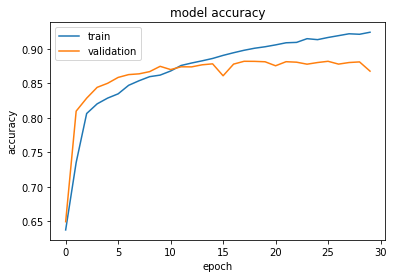

time: 240 ms (started: 2021-11-21 16:08:47 +00:00)


In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

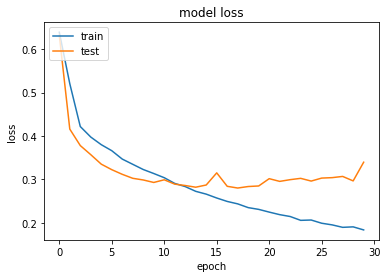

time: 197 ms (started: 2021-11-21 16:08:48 +00:00)


In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As we can observe in above graphs, the train and validation accuracy is close to each other and difference in loss between is also less. This model is not a overfitting model as previous one. 

### Use the designed model to print the prediction on any one sample

We are considering only 50 records among the dataset to get the  output and compare them. Here we are having on function for displaying the confusion matrix which will help us evaluate the score of the model.

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def print_confusion_matrix(testY, predicted_test_y):
    mat = confusion_matrix(testY, predicted_test_y)

    plt.figure(figsize=(4, 4))
    sns.set()
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=np.unique(testY),
                yticklabels=np.unique(testY))

    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

time: 244 ms (started: 2021-11-21 16:08:48 +00:00)


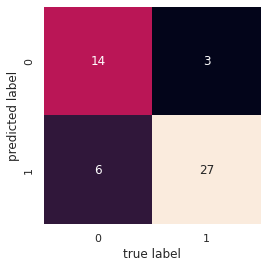

time: 662 ms (started: 2021-11-21 16:08:48 +00:00)


In [34]:
#Calculate accuracy on Unseen Dataset
sentiment_unseen = model_glove_emdb.predict(X_unseen_data)
predicted_unseen_y_binary = sentiment_unseen >= 0.5

print_confusion_matrix(y_unseen_data, predicted_unseen_y_binary)

Observation from above graphs are mentioned below

1) There are 15 True negative : True negatives (TN): We predicted no, and they are negative sentiment from viewers of movie.

2) There are 28 True positive. True positives (TP): These are cases in which we predicted yes (they are positive sentiment about the movie), and they are positive sentiment.

3) There are 3 False positive : false positives (FP): We predicted yes, but that particular review was negative. (Also known as a "Type I error.")

4) There are 6 False negative : false negatives (FN): We predicted no, but that particular review was Positive. (Also known as a "Type II error.")

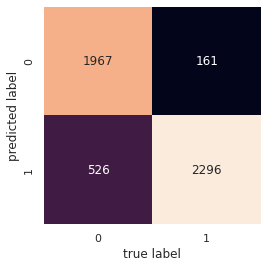

time: 1.13 s (started: 2021-11-21 16:08:49 +00:00)


In [35]:
#Calculate accuracy on Test Dataset
sentiment_test = model_glove_emdb.predict(X_test)
predicted_test_y_binary = sentiment_test >= 0.5

print_confusion_matrix(y_test, predicted_test_y_binary)

Observation from above graphs are mentioned below

1) There are 2044 True negative : True negatives (TN): We predicted no, and they are negative sentiment from viewers of movie.

2) There are 2278 True positive. True positives (TP): These are cases in which we predicted yes (they are positive sentiment about the movie), and they are positive sentiment.

3) There are 161 False positive : false positives (FP): We predicted yes, but that particular review was negative. (Also known as a "Type I error.")

4) There are 526 False negative : false negatives (FN): We predicted no, but that particular review was Positive. (Also known as a "Type II error.")

In [36]:
import pandas as pd
df_IMDB_compare_results = pd.DataFrame()
df_IMDB_compare_results['Actual_Data'] = np.where(y_unseen_data ==  1, 'Positive','Negative')

time: 5.35 ms (started: 2021-11-21 16:08:50 +00:00)


In [37]:
df_IMDB_compare_results['Predicted_Data']= np.where(predicted_unseen_y_binary, 'Positive','Negative')

time: 1.99 ms (started: 2021-11-21 16:08:50 +00:00)


Checking few examples of the movie review.

In [38]:
def print_user_review_with_sentiment(index):
  id_to_word = {value:key for key,value in word_to_id.items()}
  user_review = ' '.join(id_to_word[id] for id in X_unseen_data[index])
  print(user_review.replace("<PAD>", "").replace("  ", "").replace(" <UNK>",""))
  print(df_IMDB_compare_results.loc[index,'Actual_Data'])
  print(df_IMDB_compare_results.loc[index,'Predicted_Data'])

print_user_review_with_sentiment(0)
print()
print_user_review_with_sentiment(1)

 rarely does a film capture such intense drama and emotion what makes this film so unsettling is that the drama feels so real it's almost hard to remember that it's only a movie this is by far and alan performance of their careers the film almost feels like a theatrical production the way it is staged and lit the only bad thing about this movie is that it's very difficult to get a copy of it i have yet to see it other than on this truly powerful film deserves a transfer and special edition treatment on dvd it really is that good
Positive
Positive

<UNK> the first time i saw this movie was on a flight between china and los angeles it was a real hoot and made the trip pass with much less than the normal 10 hour flight i tried to locate a copy of it without success until i discovered a copy for sale on ebay having now watched it twice i recommend it as good entertainment my only real criticisms are that the choice of english translation words for the subtitles is sub par even by normal st

In [39]:
df_IMDB_compare_results

Actual_Data Predicted_Data
0     Positive       Positive
1     Positive       Positive
2     Positive       Positive
3     Positive       Positive
4     Negative       Negative
5     Negative       Positive
6     Positive       Positive
7     Positive       Negative
8     Positive       Positive
9     Positive       Positive
10    Negative       Negative
11    Negative       Negative
12    Negative       Positive
13    Positive       Positive
14    Positive       Positive
15    Negative       Negative
16    Negative       Negative
17    Negative       Positive
18    Negative       Negative
19    Positive       Positive
20    Negative       Negative
21    Positive       Positive
22    Positive       Positive
23    Negative       Positive
24    Positive       Positive
25    Positive       Positive
26    Negative       Negative
27    Positive       Positive
28    Positive       Positive
29    Negative       Negative
30    Negative       Negative
31    Positive       Negative
32    Positive       Positive
33    Positive       Positive
34    Positive       Positive
35    Positive       Positive
36    Negative       Negative
37    Positive       Positive
38    Positive       Positive
39    Positive       Positive
40    Positive       Negative
41    Positive       Positive
42    Negative       Positive
43    Negative       Positive
44    Negative       Negative
45    Negative       Negative
46    Positive       Positive
47    Negative       Negative
48    Positive       Positive
49    Positive       Positive

time: 23.7 ms (started: 2021-11-21 16:08:50 +00:00)


There are only few misclassification observed when comparing the result. Overall the model performance is good and it is providing better results.

### Summary



The data set provided was inbuilt in tensorflow which is having 50000 records, which is split into test, validation and unseen data for testing and validation purpose. Here we have implemented 2 models. For model #1, we built our own embedding and for model #2 we used glove model. 

The model which is built using glove model was having high accuracy and performance was better overall. The model has very less parameter to be trained and it helped avoid overfitting of the model. In general, it is always advised to use the transfer learning where ever possible so as t increase accuracy and reliability on the model. Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. It is a popular approach in deep learning where pre-trained models are used as the starting point on   natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems. Compared to word2vec, GloVe allows for parallel implementation, which means that it's easier to train over more data. It is believed (GloVe) to combine the benefits of the word2vec skip-gram model in the word analogy tasks, with those of matrix factorization methods exploiting global statistical information.

As we compared the test data, below are some observation from the  graphs.There are lot of  True negative and True positive. So the model is doing pretty well for predicting negative sentiment from viewers of movie and for predicting positive sentiment from viewers of movie. Here we also observe 179 False positive and 449 False negative these are "Type I error" and "Type II error", for mitigation of these errors either we have to go with other models like bidirectional LSTM model which takes feeds from both forward and backward direction and thus help us to understand the reviews better. 

In this project, we used pre-trained embedding - Glove. GloVe stands for “Global Vectors”. GloVe captures both global statistics and local statistics of a corpus, in order to come up with word vectors. GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors. This embedding helped us a lot in determining correct review of movie and improved accuracy of the model.



**DOMAIN:**
Social media analytics

**CONTEXT:** 
Past studies in Sarcasm Detection mostly make use of Twitter datasets collected 
using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

**DATA DESCRIPTION:**
The dataset is collected from two news websites, theonion.com and huffingtonpost.com. 
This new dataset has the following advantages over the existing Twitter datasets:
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and 
informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with 
much less noise as compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in 
teasing apart the real sarcastic elements
Content: Each record consists of three attributes:
is_sarcastic: 1 if the record is sarcastic otherwise 0
headline: the headline of the news article
article_link: link to the original news article. Useful in collecting supplementary data
 Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection


**PROJECT OBJECTIVE:** 
Build a sequential NLP classifier which can use input text parameters 
to determine the customer sentiments.
Steps and tasks: [ Total Score: 30 points]
1. Read and explore the data
2. Retain relevant columns
3. Get length of each sentence
4. Define parameters
5. Get indices for words
6. Create features and labels
7. Get vocabulary size
8. Create a weight matrix using GloVe embeddings
9. Define and compile a Bidirectional LSTM model. 
 Hint: Be analytical and experimental here in trying new approaches to design the best model.
10. Fit the model and check the validation accuracy

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.12 ms (started: 2021-11-21 16:08:50 +00:00)


In [41]:
#importing required libraries and converting them to dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gensim.downloader as api
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

time: 20 ms (started: 2021-11-21 16:08:50 +00:00)


### Read and explore the data

In [42]:
#parsing the input Json value
def parseJson(fname):
  for line in open(fname, 'r'):
    yield eval(line)

time: 1.72 ms (started: 2021-11-21 16:08:50 +00:00)


In [43]:
#reading the Json data as List
data = list(parseJson('/content/drive/MyDrive/MachineLearning/NLP/Project/Week6Project/Sarcasm_Headlines_Dataset.json'))

time: 1.58 s (started: 2021-11-21 16:08:50 +00:00)


In [44]:
#printing lenght of data (as list)
print("Length of the data (as list) : ", len(data))

Length of the data (as list) :  28619
time: 1.04 ms (started: 2021-11-21 16:08:52 +00:00)


In [45]:
df  =  pd.DataFrame(data)

time: 34.6 ms (started: 2021-11-21 16:08:52 +00:00)


##### Applying some basic analysis on the dataframe.

In [46]:
df.sample(10)

is_sarcastic  ...                                       article_link
24001             1  ...  https://politics.theonion.com/judge-restricts-...
20790             0  ...  https://www.huffingtonpost.com/entry/home-inva...
7115              1  ...  https://local.theonion.com/area-man-too-deep-i...
10552             1  ...  https://politics.theonion.com/report-white-hou...
26381             1  ...  https://www.theonion.com/ap-reporter-in-gaza-n...
8305              0  ...  https://www.huffingtonpost.com/entry/lawyer-na...
19404             1  ...  https://politics.theonion.com/nation-s-still-u...
2702              1  ...  https://www.theonion.com/good-news-kept-from-p...
6098              1  ...  https://entertainment.theonion.com/area-woman-...
22363             0  ...  https://www.huffingtonpost.com/entry/baby-jesu...

[10 rows x 3 columns]

time: 20.2 ms (started: 2021-11-21 16:08:52 +00:00)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb232be0c10>],
      dtype=object)

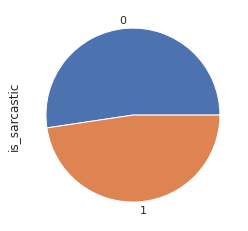

time: 107 ms (started: 2021-11-21 16:08:52 +00:00)


In [47]:
df['is_sarcastic'].value_counts().plot.pie(subplots=True)

The dataset is having almost equal number of sarcastic and normal headlines. Although it is not exactly balanced dataset.

Lets check frequent word using library

WordCloud is a technique to show which words are the most frequent among the given text.

Word Clouds (also known as wordle, word collage or tag cloud) are visual representations of words that give greater prominence to words that appear more frequently.

In [48]:
from wordcloud import WordCloud, STOPWORDS
# Reference: # https://www.geeksforgeeks.org/generating-word-cloud-python/
def wordcloud_plot(df):
  comment_words = ""
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df.headline:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
          background_color = "white",
          stopwords = stopwords,
          min_font_size = 10).generate(comment_words)

  # plot the WordCloud image					
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

time: 48.6 ms (started: 2021-11-21 16:08:52 +00:00)


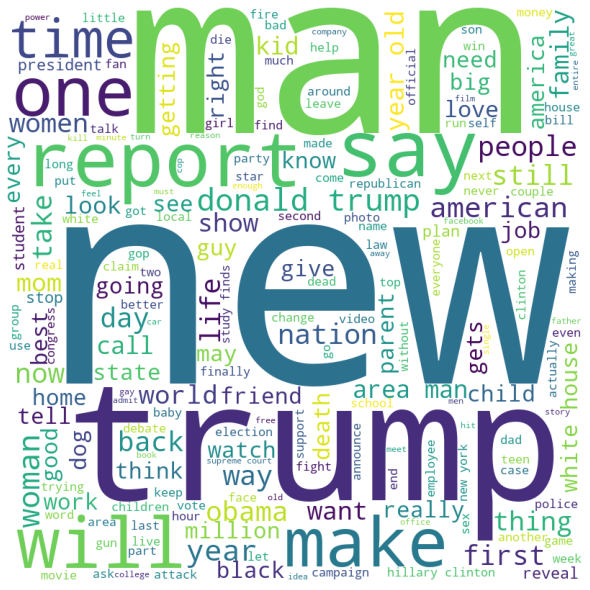

time: 4.26 s (started: 2021-11-21 16:08:52 +00:00)


In [49]:
wordcloud_plot(df[['headline']])

As observed, the above image shows the frequent words used among the given text.

### Get length of each sentence by Adding new column to the dataset

In [50]:
df['LengthOfSentence'] = df["headline"].str.len()

time: 22.2 ms (started: 2021-11-21 16:08:56 +00:00)


In [51]:
df

is_sarcastic  ... LengthOfSentence
0                 1  ...               61
1                 0  ...               79
2                 0  ...               49
3                 1  ...               52
4                 1  ...               61
...             ...  ...              ...
28614             1  ...               44
28615             1  ...               87
28616             0  ...               71
28617             1  ...               61
28618             1  ...               34

[28619 rows x 4 columns]

time: 26.3 ms (started: 2021-11-21 16:08:56 +00:00)


PLoting the number of rows against the length of sentence with bins.

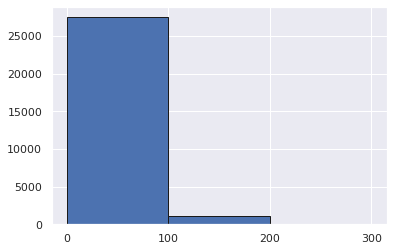

time: 185 ms (started: 2021-11-21 16:08:56 +00:00)


In [52]:
df['LengthOfSentence']
bins= [0,100,200,300]
plt.hist(df['LengthOfSentence'], bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

Checking max length available in the headlines column

In [53]:
df['LengthOfSentence'].max()

926

time: 3.29 ms (started: 2021-11-21 16:08:56 +00:00)


### Retain relevant columns

In [54]:
processedDataFrame = df[['headline','is_sarcastic']]

time: 4.22 ms (started: 2021-11-21 16:08:56 +00:00)


In [55]:
processedDataFrame

headline  is_sarcastic
0      thirtysomething scientists unveil doomsday clo...             1
1      dem rep. totally nails why congress is falling...             0
2      eat your veggies: 9 deliciously different recipes             0
3      inclement weather prevents liar from getting t...             1
4      mother comes pretty close to using word 'strea...             1
...                                                  ...           ...
28614       jews to celebrate rosh hashasha or something             1
28615  internal affairs investigator disappointed con...             1
28616  the most beautiful acceptance speech this week...             0
28617  mars probe destroyed by orbiting spielberg-gat...             1
28618                 dad clarifies this not a food stop             1

[28619 rows x 2 columns]

time: 14.6 ms (started: 2021-11-21 16:08:56 +00:00)


Checking one sample record

In [56]:
processedDataFrame.loc[102, ['headline','is_sarcastic']]

headline        after decades of effort, chemists overseas rep...
is_sarcastic                                                    0
Name: 102, dtype: object

time: 5.19 ms (started: 2021-11-21 16:08:56 +00:00)


### Define parameters

In [57]:
#Preprocessing the training and test headlines for the word embedding
vocab_size = 30000
embedding_dim = 50
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

time: 1.66 ms (started: 2021-11-21 16:08:56 +00:00)


Here we are using vocabulary size of 30000 which almost covers almost all the word available in the given dataset. Here we are defining the embedding dimension as 50 and maximum length is 100 for each review.

### Creating required train test split on the prepared data set (Create features and labels).

In the project (Module) requirement PDF, it is mentioned that to get the indices first and then create featues and labels

Task are mentioned as below
Get indices for words
Create features and labels

If we create indices first, then even the test data will also be seen. And in reality there are fair chances that an unseen word may appear in the document. 

So here we shall check the performance of the model on both 

1) Applying tokenizer on whole dataset and build the model

2) Applying tokenizer after splitting the dataset into train and test.

#### applying tokenizer on whole dataset

In [58]:
tokenizer_whole_dataset = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer_whole_dataset.fit_on_texts(processedDataFrame['headline'])
word_index_whole_dataset = tokenizer_whole_dataset.word_index
df_headlines_sequences = tokenizer_whole_dataset.texts_to_sequences(processedDataFrame['headline'])
df_headlines_padded = pad_sequences(df_headlines_sequences,maxlen=max_length, truncating=trunc_type)

time: 1 s (started: 2021-11-21 16:08:56 +00:00)


In [59]:
print(processedDataFrame.iloc[0]['headline'])
print(df_headlines_padded[0])

thirtysomething scientists unveil doomsday clock of hair loss
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0 16004   355  3167  7474
  2644     3   661  1119]
time: 2.02 ms (started: 2021-11-21 16:08:58 +00:00)


In [60]:
print(processedDataFrame.iloc[2]['headline'])
print(df_headlines_padded[2])

eat your veggies: 9 deliciously different recipes
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0   863    33 11427
   262 16005   647  1484]
time: 2.16 ms (started: 2021-11-21 16:08:58 +00:00)


In [61]:
train_whole_dataset, validation_whole_dataset = train_test_split(df_headlines_padded, test_size=0.2, random_state=42)
print("Train data shape ::", train_whole_dataset.shape)
print("Validation data shape ::", validation_whole_dataset.shape)

Train data shape :: (22895, 100)
Validation data shape :: (5724, 100)
time: 10 ms (started: 2021-11-21 16:08:58 +00:00)


In [62]:
#Checking basic statistic about the tokenizer
print(tokenizer_whole_dataset.word_counts)
print(tokenizer_whole_dataset.document_count)
print(tokenizer_whole_dataset.word_index)
print(tokenizer_whole_dataset.word_docs)

OrderedDict([('thirtysomething', 1), ('scientists', 103), ('unveil', 13), ('doomsday', 4), ('clock', 16), ('of', 6292), ('hair', 61), ('loss', 39), ('dem', 4), ('rep', 25), ('totally', 54), ('nails', 13), ('why', 509), ('congress', 139), ('is', 1711), ('falling', 24), ('short', 41), ('on', 2656), ('gender', 29), ('racial', 20), ('equality', 24), ('eat', 48), ('your', 667), ('veggies', 2), ('9', 131), ('deliciously', 1), ('different', 62), ('recipes', 30), ('inclement', 2), ('weather', 28), ('prevents', 5), ('liar', 6), ('from', 1329), ('getting', 211), ('to', 9096), ('work', 203), ('mother', 81), ('comes', 78), ('pretty', 111), ('close', 45), ('using', 69), ('word', 71), ("'streaming'", 1), ('correctly', 5), ('my', 315), ('white', 366), ('inheritance', 2), ('5', 315), ('ways', 124), ('file', 9), ('taxes', 17), ('with', 1956), ('less', 69), ('stress', 33), ('richard', 24), ("branson's", 1), ('global', 53), ('warming', 7), ('donation', 13), ('nearly', 39), ('as', 877), ('much', 149), ('c

As displayed in above cell, the words are having the index based on their occurance and these indexes will be used to generate the embeddings for the words.

#### Get vocabulary size

In [63]:
print("Vocab Size :: " , len(word_index_whole_dataset))

Vocab Size ::  30885
time: 855 µs (started: 2021-11-21 16:08:58 +00:00)


#### Applying tokenizer after splitting the dataset into train and test.

In [64]:
train, validation = train_test_split(processedDataFrame, test_size=0.2, random_state=42)
train.shape, validation.shape

((22895, 2), (5724, 2))

time: 9.3 ms (started: 2021-11-21 16:08:58 +00:00)


In [65]:
train.reset_index(inplace=True, drop=True)
validation.reset_index(inplace=True, drop=True)

time: 1.12 ms (started: 2021-11-21 16:08:58 +00:00)


In [66]:
X_train = train['headline']
y_train = train['is_sarcastic']

time: 1.21 ms (started: 2021-11-21 16:08:58 +00:00)


In [67]:
X_test = validation['headline']
y_test = validation['is_sarcastic']

time: 1.15 ms (started: 2021-11-21 16:08:58 +00:00)


### Get indices for words

In [68]:
tokenizer_split_data = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer_split_data.fit_on_texts(X_train)
word_index_split_data = tokenizer_split_data.word_index
train_sequences_split_data = tokenizer_split_data.texts_to_sequences(X_train)
train_padded_split_data = pad_sequences(train_sequences_split_data,maxlen=max_length, truncating=trunc_type)

test_sequences_split_data = tokenizer_split_data.texts_to_sequences(X_test)
test_padded_split_data = pad_sequences(test_sequences_split_data,maxlen=max_length, truncating=trunc_type)

time: 1.01 s (started: 2021-11-21 16:08:58 +00:00)


Checking length and one sample record 


In [69]:
print(len(train_padded_split_data))
print(len(test_padded_split_data))

22895
5724
time: 1.62 ms (started: 2021-11-21 16:08:59 +00:00)


In [70]:
print(train_padded_split_data[2])
print()
print(X_train[2])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0 5440 1861  105  533  504
  150  163]

stripper failing school she's working self through
time: 2.25 ms (started: 2021-11-21 16:08:59 +00:00)


Checking basic statistic about the tokenizer

In [71]:
#Checking basic statistic about the tokenizer
print(tokenizer_split_data.word_counts)
print(tokenizer_split_data.document_count)
print(tokenizer_split_data.word_index)
print(tokenizer_split_data.word_docs)

OrderedDict([('how', 676), ('trump', 1118), ('really', 202), ('feels', 50), ('about', 903), ('queer', 42), ('people', 314), ('explained', 6), ('in', 3616), ('one', 449), ('sentence', 18), ('egyptian', 7), ('death', 184), ('for', 2863), ('soccer', 23), ('fans', 87), ('puts', 43), ("president's", 18), ('iron', 9), ('grip', 3), ('to', 7259), ('the', 4268), ('test', 42), ('stripper', 5), ('failing', 19), ('school', 210), ("she's", 59), ('working', 61), ('self', 161), ('through', 152), ('texas', 65), ('attorney', 18), ('general', 36), ('ken', 10), ('paxton', 3), ('indicted', 10), ('congresswoman', 5), ('fights', 10), ('gun', 117), ('control', 78), ('because', 81), ('she', 190), ('almost', 38), ('lost', 57), ('her', 339), ('life', 312), ('violence', 77), ('lana', 3), ('del', 7), ('rey', 2), ('and', 1587), ('stevie', 4), ('nicks', 4), ('cast', 26), ('a', 2554), ('joint', 8), ('musical', 16), ('spell', 4), ('on', 2139), ('upcoming', 29), ('album', 37), ('food', 110), ('insecurity', 1), ('inact

### Create a weight matrix using GloVe embeddings

using gensim library and load the glove embedding. The basic idea behind the GloVe word embedding is to derive the relationship between the words from statistics. Unlike the occurrence matrix, the co-occurrence matrix tells you how often a particular word pair occurs together. Each value in the co-occurrence matrix represents a pair of words occurring together.

In [72]:
#Load Glove model (similar to Word2Vec)
glove_model = api.load('glove-wiki-gigaword-50')
#Size of the model
glove_model.vectors.shape
#Initialize embedding matrix for our dataset with 10000+1 rows (1 for padding word)
#and 50 columns (as embedding size is 50)
embedding_matrix = np.zeros((vocab_size + 1, embedding_dim))

time: 26.8 s (started: 2021-11-21 16:08:59 +00:00)


In [73]:
glove_model['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

time: 5.3 ms (started: 2021-11-21 16:09:26 +00:00)


In [74]:
tokenizer_split_data.word_index.items()

dict_items([('<OOV>', 1), ('to', 2), ('of', 3), ('the', 4), ('in', 5), ('for', 6), ('a', 7), ('on', 8), ('and', 9), ('with', 10), ('is', 11), ('new', 12), ('trump', 13), ('man', 14), ('at', 15), ('from', 16), ('about', 17), ('by', 18), ('after', 19), ('you', 20), ('this', 21), ('up', 22), ('out', 23), ('be', 24), ('that', 25), ('as', 26), ('how', 27), ('it', 28), ('not', 29), ('he', 30), ('are', 31), ('just', 32), ('his', 33), ('your', 34), ('what', 35), ('all', 36), ('who', 37), ('has', 38), ('will', 39), ('into', 40), ('report', 41), ('more', 42), ('one', 43), ('have', 44), ('over', 45), ('year', 46), ('u', 47), ('area', 48), ('says', 49), ('why', 50), ('can', 51), ('day', 52), ('s', 53), ('woman', 54), ('like', 55), ('first', 56), ('time', 57), ('donald', 58), ('no', 59), ('get', 60), ('her', 61), ('now', 62), ('old', 63), ('off', 64), ("trump's", 65), ("'", 66), ('people', 67), ('life', 68), ('obama', 69), ('house', 70), ('an', 71), ('white', 72), ('still', 73), ('back', 74), ('mak

time: 75.3 ms (started: 2021-11-21 16:09:26 +00:00)


In [75]:
for word, i in sorted(tokenizer_split_data.word_index.items(),key=lambda x:x[1]):
    if i > (vocab_size+1):
        break
    try:
        embedding_vector = glove_model[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
        pass

time: 117 ms (started: 2021-11-21 16:09:26 +00:00)


In [76]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
        -0.064699  , -0.26043999],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

time: 4.6 ms (started: 2021-11-21 16:09:26 +00:00)


### Define and compile a Bidirectional LSTM model. 
( Fit the model and check the validation accuracy)

##### Model #1 : Multiple Bidirectional layers and using data of seprate tokenizer. Tokenizer which is applied on X_train and X_test seprately.

In [77]:
model1_glove_emdb = tf.keras.Sequential()
model1_glove_emdb.add(tf.keras.layers.Embedding(vocab_size + 1, #Vocablury size
                                    embedding_dim, #Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=max_length) #Number of words in each review
          )
model1_glove_emdb.output

<KerasTensor: shape=(None, 100, 50) dtype=float32 (created by layer 'embedding_1')>

time: 25.2 ms (started: 2021-11-21 16:09:26 +00:00)


In [78]:
model1_glove_emdb.add(tf.keras.layers.Dropout(0.30))
model1_glove_emdb.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences = True),merge_mode='sum')) #RNN State - size of cell state and hidden state
model1_glove_emdb.output

<KerasTensor: shape=(None, 100, 200) dtype=float32 (created by layer 'bidirectional')>

time: 672 ms (started: 2021-11-21 16:09:26 +00:00)


In [79]:
model1_glove_emdb.add(tf.keras.layers.Dropout(0.20))
model1_glove_emdb.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences = True),merge_mode='concat')) #RNN State - size of cell state and hidden state
model1_glove_emdb.output

<KerasTensor: shape=(None, 100, 300) dtype=float32 (created by layer 'bidirectional_1')>

time: 626 ms (started: 2021-11-21 16:09:26 +00:00)


In [80]:
model1_glove_emdb.add(tf.keras.layers.Dropout(0.20))
model1_glove_emdb.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100), merge_mode='mul')) #RNN State - size of cell state and hidden state
model1_glove_emdb.output

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'bidirectional_2')>

time: 602 ms (started: 2021-11-21 16:09:27 +00:00)


In [81]:
model1_glove_emdb.add(tf.keras.layers.Dropout(0.20))
model1_glove_emdb.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model1_glove_emdb.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           1500050   
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 100, 200)         401600    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 100, 200)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 300)         421200    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 100, 300)         

In [82]:
#Compile the model
model1_glove_emdb.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

time: 12.1 ms (started: 2021-11-21 16:09:28 +00:00)


In [83]:
# model_n.summary()
history_model1 = model1_glove_emdb.fit(train_padded_split_data, y_train,
          epochs=10,
          batch_size=32, validation_data=(test_padded_split_data, y_test))

Epoch 1/10
716/716 [==============================] - 47s 52ms/step - loss: 0.5776 - accuracy: 0.7001 - val_loss: 0.4760 - val_accuracy: 0.7748
Epoch 2/10
716/716 [==============================] - 35s 48ms/step - loss: 0.4724 - accuracy: 0.7750 - val_loss: 0.3958 - val_accuracy: 0.8188
Epoch 3/10
716/716 [==============================] - 35s 49ms/step - loss: 0.4291 - accuracy: 0.8006 - val_loss: 0.3778 - val_accuracy: 0.8312
Epoch 4/10
716/716 [==============================] - 35s 49ms/step - loss: 0.3984 - accuracy: 0.8197 - val_loss: 0.3742 - val_accuracy: 0.8311
Epoch 5/10
716/716 [==============================] - 36s 50ms/step - loss: 0.3754 - accuracy: 0.8316 - val_loss: 0.3454 - val_accuracy: 0.8461
Epoch 6/10
716/716 [==============================] - 36s 50ms/step - loss: 0.3501 - accuracy: 0.8426 - val_loss: 0.3297 - val_accuracy: 0.8519
Epoch 7/10
716/716 [==============================] - 36s 50ms/step - loss: 0.3325 - accuracy: 0.8535 - val_loss: 0.3435 - val_accuracy:

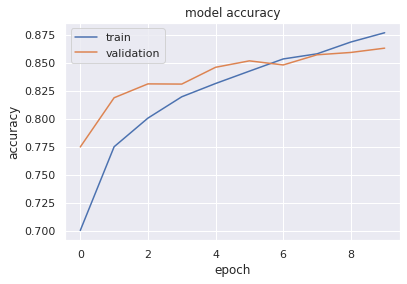

time: 327 ms (started: 2021-11-21 16:15:35 +00:00)


In [84]:
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Train and validation accuracy is close to each other and there are not a lot of divergance observed in the graph. This model looks like a good fit model and there is very less overfit observed in the model.

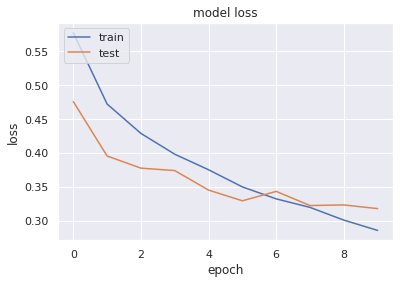

time: 323 ms (started: 2021-11-21 16:15:35 +00:00)


In [85]:
# summarize history for loss
plt.plot(history_model1.history['loss'])
plt.plot(history_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train and validation loss is close to each other and there are not a lot of divergance observed in the graph. This model looks like a good fit model and there is very less overfit observed in the model.

To build this model we are using multiple layers of bidirectional LSTM and each with different hidden and cell state size and with few dropput layers. One thing we need to observe here is that using drop out layer right before sigmoid. This has helped to reduce overfit of the model. This is bit unconventional, since we seldom used dropout layer just above sigmoid output layer. But in this case it has helped to reduce the overfitting of the model. 

We are using glove embedding for weights and this has helped to greatly increase accuracy of the model. This has also helped to reduce training time for this model.

##### Model #2 : Single Bidirectional layers and using data of seprate tokenizer. Tokenizer which is applied on X_train and X_test seprately.

In [86]:
model2_glove_emdb = tf.keras.Sequential()
model2_glove_emdb.add(tf.keras.layers.Embedding(vocab_size + 1, #Vocablury size
                                    embedding_dim, #Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=max_length) #Number of words in each review
          )
model2_glove_emdb.output


<KerasTensor: shape=(None, 100, 50) dtype=float32 (created by layer 'embedding_2')>

time: 23.8 ms (started: 2021-11-21 16:15:35 +00:00)


In [87]:
model2_glove_emdb.add(tf.keras.layers.Dropout(0.15))
model2_glove_emdb.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200))) #RNN State - size of cell state and hidden state
model2_glove_emdb.output

<KerasTensor: shape=(None, 400) dtype=float32 (created by layer 'bidirectional_3')>

time: 626 ms (started: 2021-11-21 16:15:36 +00:00)


In [88]:
model2_glove_emdb.add(tf.keras.layers.Dropout(0.15))
model2_glove_emdb.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model2_glove_emdb.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           1500050   
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 400)              401600    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,902,051
Trainable params: 402,001
Non-trainable params: 1,500,050
______________________________________

In [89]:
#Compile the model
model2_glove_emdb.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

time: 12.2 ms (started: 2021-11-21 16:15:36 +00:00)


In [90]:
# model_n.summary()
history_model2 = model2_glove_emdb.fit(train_padded_split_data, y_train,
          epochs=10,
          batch_size=32, validation_data=(test_padded_split_data, y_test))

Epoch 1/10
716/716 [==============================] - 18s 20ms/step - loss: 0.5486 - accuracy: 0.7215 - val_loss: 0.4542 - val_accuracy: 0.7848
Epoch 2/10
716/716 [==============================] - 13s 18ms/step - loss: 0.4392 - accuracy: 0.7994 - val_loss: 0.3924 - val_accuracy: 0.8171
Epoch 3/10
716/716 [==============================] - 13s 18ms/step - loss: 0.4549 - accuracy: 0.7830 - val_loss: 0.6062 - val_accuracy: 0.6716
Epoch 4/10
716/716 [==============================] - 13s 18ms/step - loss: 0.4190 - accuracy: 0.8062 - val_loss: 0.3626 - val_accuracy: 0.8332
Epoch 5/10
716/716 [==============================] - 13s 18ms/step - loss: 0.3474 - accuracy: 0.8465 - val_loss: 0.3866 - val_accuracy: 0.8215
Epoch 6/10
716/716 [==============================] - 13s 18ms/step - loss: 0.3217 - accuracy: 0.8608 - val_loss: 0.3450 - val_accuracy: 0.8512
Epoch 7/10
716/716 [==============================] - 13s 18ms/step - loss: 0.3113 - accuracy: 0.8652 - val_loss: 0.3445 - val_accuracy:

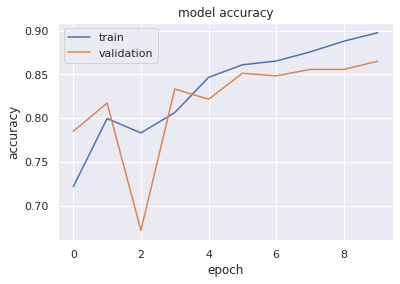

time: 302 ms (started: 2021-11-21 16:18:02 +00:00)


In [91]:
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

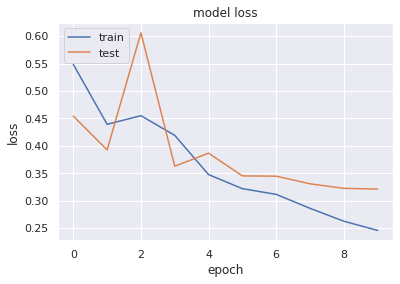

time: 309 ms (started: 2021-11-21 16:18:02 +00:00)


In [92]:
# summarize history for loss
plt.plot(history_model2.history['loss'])
plt.plot(history_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

It looks like this model and the one earlier are having same kind of behaviour

##### Model #3 : Multiple Bidirectional layers and using data of tokenized whole dataset

In [93]:
embedding_matrix_whole_dataset = np.zeros((vocab_size + 1, embedding_dim))

time: 7.83 ms (started: 2021-11-21 16:18:02 +00:00)


In [94]:
for word, i in sorted(tokenizer_whole_dataset.word_index.items(),key=lambda x:x[1]):
    if i > (vocab_size+1):
        break
    try:
        embedding_vector = glove_model[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix_whole_dataset[i] = embedding_vector
    except:
        pass

time: 101 ms (started: 2021-11-21 16:18:02 +00:00)


In [95]:
model3_glove_emdb_wholeDataset = tf.keras.Sequential()
model3_glove_emdb_wholeDataset.add(tf.keras.layers.Embedding(vocab_size + 1, #Vocablury size
                                    embedding_dim, #Embedding size
                                    weights=[embedding_matrix_whole_dataset],
                                    trainable=False,
                                    input_length=max_length) #Number of words in each review
          )
model3_glove_emdb_wholeDataset.output

<KerasTensor: shape=(None, 100, 50) dtype=float32 (created by layer 'embedding_3')>

time: 22.3 ms (started: 2021-11-21 16:18:02 +00:00)


In bi-directional LSTM model, 

1) data from one LSTM gets fed in forward direction

2) While for the other LSTM, data is fed in reverse direction.

The arrangement will aid for better learning of sentences.

Output of LSTM will get Combined. There are different merge mode available (Add, Concat, mul)

The words that come in the sentences can change the meaning and it is recommended to use it.

In [96]:
model3_glove_emdb_wholeDataset.add(tf.keras.layers.Dropout(0.15))
model3_glove_emdb_wholeDataset.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences = True),merge_mode='sum')) #RNN State - size of cell state and hidden state
model3_glove_emdb_wholeDataset.output

<KerasTensor: shape=(None, 100, 200) dtype=float32 (created by layer 'bidirectional_4')>

time: 625 ms (started: 2021-11-21 16:18:02 +00:00)


In [97]:
model3_glove_emdb_wholeDataset.add(tf.keras.layers.Dropout(0.10))
model3_glove_emdb_wholeDataset.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences = True),merge_mode='concat')) #RNN State - size of cell state and hidden state
model3_glove_emdb_wholeDataset.output

<KerasTensor: shape=(None, 100, 300) dtype=float32 (created by layer 'bidirectional_5')>

time: 610 ms (started: 2021-11-21 16:18:03 +00:00)


In [98]:
model3_glove_emdb_wholeDataset.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100), merge_mode='mul')) #RNN State - size of cell state and hidden state
model3_glove_emdb_wholeDataset.output

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'bidirectional_6')>

time: 597 ms (started: 2021-11-21 16:18:04 +00:00)


In [99]:
 model3_glove_emdb_wholeDataset.add(tf.keras.layers.Dropout(0.15))
model3_glove_emdb_wholeDataset.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model3_glove_emdb_wholeDataset.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           1500050   
                                                                 
 dropout_7 (Dropout)         (None, 100, 50)           0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 200)         401600    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 100, 200)          0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 100, 300)         421200    
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 100)             

In [100]:
#Compile the model
model3_glove_emdb_wholeDataset.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

time: 8.16 ms (started: 2021-11-21 16:18:04 +00:00)


In [101]:
# model_n.summary()
history_model3_glove_emdb_wholeDataset = model3_glove_emdb_wholeDataset.fit(train_padded_split_data, y_train,
          epochs=10,
          batch_size=32, validation_data=(test_padded_split_data, y_test))
		  


Epoch 1/10
716/716 [==============================] - 46s 51ms/step - loss: 0.6497 - accuracy: 0.6136 - val_loss: 0.5933 - val_accuracy: 0.6571
Epoch 2/10
716/716 [==============================] - 34s 48ms/step - loss: 0.5724 - accuracy: 0.6853 - val_loss: 0.5386 - val_accuracy: 0.7154
Epoch 3/10
716/716 [==============================] - 34s 48ms/step - loss: 0.5239 - accuracy: 0.7282 - val_loss: 0.5263 - val_accuracy: 0.7379
Epoch 4/10
716/716 [==============================] - 34s 47ms/step - loss: 0.4885 - accuracy: 0.7538 - val_loss: 0.4827 - val_accuracy: 0.7589
Epoch 5/10
716/716 [==============================] - 35s 49ms/step - loss: 0.4603 - accuracy: 0.7725 - val_loss: 0.4605 - val_accuracy: 0.7755
Epoch 6/10
716/716 [==============================] - 35s 49ms/step - loss: 0.4247 - accuracy: 0.7999 - val_loss: 0.4643 - val_accuracy: 0.7783
Epoch 7/10
716/716 [==============================] - 35s 49ms/step - loss: 0.3923 - accuracy: 0.8145 - val_loss: 0.4592 - val_accuracy:

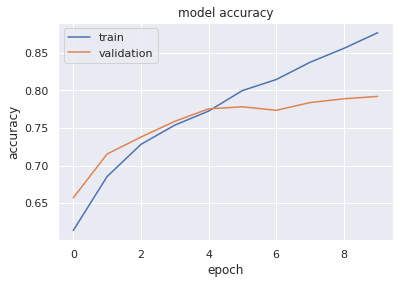

time: 324 ms (started: 2021-11-21 16:24:05 +00:00)


In [102]:
plt.plot(history_model3_glove_emdb_wholeDataset.history['accuracy'])
plt.plot(history_model3_glove_emdb_wholeDataset.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

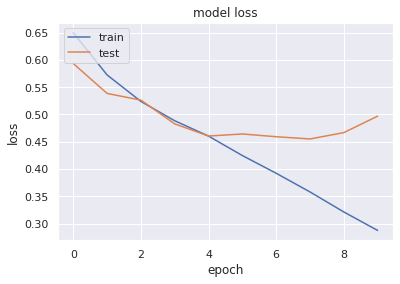

time: 319 ms (started: 2021-11-21 16:24:05 +00:00)


In [103]:
# summarize history for loss
plt.plot(history_model3_glove_emdb_wholeDataset.history['loss'])
plt.plot(history_model3_glove_emdb_wholeDataset.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

There is a hige gap in the loss and bit less accurate than other model and hence cannot be used for prediction

##### Model #4 : Single Bidirectional layers and using data of tokenized whole dataset

In [104]:
model4_glove_emdb_wholeDataset = tf.keras.Sequential()
model4_glove_emdb_wholeDataset.add(tf.keras.layers.Embedding(vocab_size + 1, #Vocablury size
                                    embedding_dim, #Embedding size
                                    weights=[embedding_matrix_whole_dataset],
                                    trainable=False,
                                    input_length=max_length) #Number of words in each review
          )
model4_glove_emdb_wholeDataset.output

<KerasTensor: shape=(None, 100, 50) dtype=float32 (created by layer 'embedding_4')>

time: 23.2 ms (started: 2021-11-21 16:24:06 +00:00)


In [105]:
# model4_glove_emdb_wholeDataset.add(tf.keras.layers.Dropout(0.15))
model4_glove_emdb_wholeDataset.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200)))#,merge_mode='sum') #RNN State - size of cell state and hidden state
model4_glove_emdb_wholeDataset.output

<KerasTensor: shape=(None, 400) dtype=float32 (created by layer 'bidirectional_7')>

time: 628 ms (started: 2021-11-21 16:24:06 +00:00)


In [106]:
model4_glove_emdb_wholeDataset.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model4_glove_emdb_wholeDataset.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_4')>

time: 18.3 ms (started: 2021-11-21 16:24:06 +00:00)


In [107]:
model4_glove_emdb_wholeDataset.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 50)           1500050   
                                                                 
 bidirectional_7 (Bidirectio  (None, 400)              401600    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,902,051
Trainable params: 402,001
Non-trainable params: 1,500,050
_________________________________________________________________
time: 2.44 ms (started: 2021-11-21 16:24:06 +00:00)


In [108]:
#Compile the model
model4_glove_emdb_wholeDataset.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

time: 6.54 ms (started: 2021-11-21 16:24:06 +00:00)


In [109]:
# model_n.summary()
history_model4_wholeDataset = model4_glove_emdb_wholeDataset.fit(train_whole_dataset, y_train,
          epochs=10,
          batch_size=32, validation_data=(validation_whole_dataset, y_test))

Epoch 1/10
716/716 [==============================] - 17s 19ms/step - loss: 0.5295 - accuracy: 0.7359 - val_loss: 0.4320 - val_accuracy: 0.7952
Epoch 2/10
716/716 [==============================] - 13s 18ms/step - loss: 0.3933 - accuracy: 0.8225 - val_loss: 0.3666 - val_accuracy: 0.8382
Epoch 3/10
716/716 [==============================] - 13s 18ms/step - loss: 0.3360 - accuracy: 0.8501 - val_loss: 0.3420 - val_accuracy: 0.8484
Epoch 4/10
716/716 [==============================] - 13s 18ms/step - loss: 0.2949 - accuracy: 0.8713 - val_loss: 0.3304 - val_accuracy: 0.8501
Epoch 5/10
716/716 [==============================] - 13s 18ms/step - loss: 0.2533 - accuracy: 0.8912 - val_loss: 0.3391 - val_accuracy: 0.8557
Epoch 6/10
716/716 [==============================] - 13s 18ms/step - loss: 0.2140 - accuracy: 0.9126 - val_loss: 0.3355 - val_accuracy: 0.8583
Epoch 7/10
716/716 [==============================] - 13s 18ms/step - loss: 0.1719 - accuracy: 0.9309 - val_loss: 0.3576 - val_accuracy:

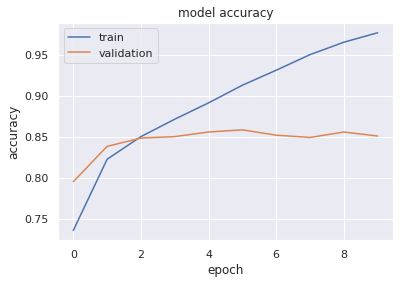

time: 318 ms (started: 2021-11-21 16:26:18 +00:00)


In [110]:
plt.plot(history_model4_wholeDataset.history['accuracy'])
plt.plot(history_model4_wholeDataset.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

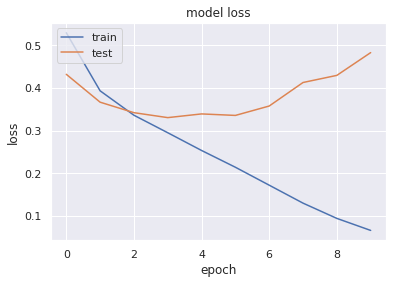

time: 320 ms (started: 2021-11-21 16:26:18 +00:00)


In [111]:
# summarize history for loss
plt.plot(history_model4_wholeDataset.history['loss'])
plt.plot(history_model4_wholeDataset.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

There is a hige gap in the accuracy and loss graph, thsi model looks like a overfit model and hence cannot be used for prediction

In [112]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def print_confusion_matrix(testY, predicted_test_y):
    mat = confusion_matrix(testY, predicted_test_y)

    plt.figure(figsize=(4, 4))
    sns.set()
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=np.unique(testY),
                yticklabels=np.unique(testY))

    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

time: 6.46 ms (started: 2021-11-21 16:26:19 +00:00)


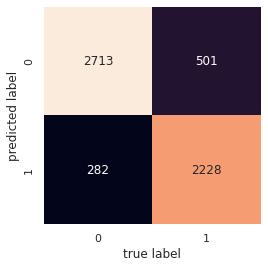

time: 5.44 s (started: 2021-11-21 16:26:19 +00:00)


In [113]:
#Calculate accuracy on Unseen Dataset
sarcasm_test = model1_glove_emdb.predict(test_padded_split_data)
sarcasm_predicted_test_y_binary = sarcasm_test >= 0.5

print_confusion_matrix(y_test, sarcasm_predicted_test_y_binary)
# # model_n.summary()
# history_model2 = model2_glove_emdb.fit(train_padded_split_data, y_train,
#           epochs=10,
#           batch_size=32, validation_data=(test_padded_split_data, y_test))

Observation from above graphs are mentioned below

1) There are 2658 True negative : True negatives (TN): We predicted no, and they are negative sentiment from viewers of movie.

2) There are 2257 True positive. True positives (TP): These are cases in which we predicted yes (they are positive sentiment about the movie), and they are positive sentiment.

3) There are 501 False positive : false positives (FP): We predicted yes, but that particular review was negative. (Also known as a "Type I error.")

4) There are 282 False negative : false negatives (FN): We predicted no, but that particular review was Positive. (Also known as a "Type II error.")

In [114]:
import pandas as pd
df_sarcasm_compare_results = pd.DataFrame()
df_sarcasm_compare_results['Actual_Data'] = np.where(y_test ==  1, 'Sarcastic','Not a Sarcastic')
df_sarcasm_compare_results['Predicted_Data']= np.where(sarcasm_predicted_test_y_binary, 'Sarcastic','Not a Sarcastic')

time: 10.3 ms (started: 2021-11-21 16:26:24 +00:00)


In [115]:
df_sarcasm_compare_results

Actual_Data   Predicted_Data
0     Not a Sarcastic  Not a Sarcastic
1           Sarcastic        Sarcastic
2           Sarcastic        Sarcastic
3           Sarcastic        Sarcastic
4     Not a Sarcastic  Not a Sarcastic
...               ...              ...
5719  Not a Sarcastic  Not a Sarcastic
5720        Sarcastic  Not a Sarcastic
5721  Not a Sarcastic  Not a Sarcastic
5722  Not a Sarcastic  Not a Sarcastic
5723        Sarcastic        Sarcastic

[5724 rows x 2 columns]

time: 16.4 ms (started: 2021-11-21 16:26:24 +00:00)


### Summary 

In the given project objective is to determine if the headline is sarcastic or not. For predicting same we have used bidirectional LSTM models. We have evaluated four models. Two model are fed data where in entire dataset was tokenised at once, where as other two models are fed with data after spliting the input data into train and test split and then tokenising them. The ideas here is to mask the data altogether as a validation data and then provide it to the model for validation purpose. This method has worked out good and the accuracy of the model observed is also good.

In this project we are using glove embedding, by this way we are transfer learning and reducing the number of weights and biases which has to be learnt and thus reducing the resource and execution time and increasing the accuracy of the model.  Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. It is a popular approach in deep learning where pre-trained models are used as the starting point on natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems. Compared to word2vec, GloVe allows for parallel implementation, which means that it's easier to train over more data. It is believed (GloVe) to combine the benefits of the word2vec skip-gram model in the word analogy tasks, with those of matrix factorization methods exploiting global statistical information.

We have evaluated four model, among them the model #1 which is having multiple bidirectional LSTM layers and which is trained on the data which is split tokenised has worked well and for the same model the accuracy score are mentioned in above cells. The accuracy of model when compared with train and validation it looks like the model is a good fit and there is very less overfit observed in the model. We are using glove embedding for weights and this has helped to greatly increase accuracy of the model. This has also helped to reduce training time for this model. Model #1 and model#2 seems to be performing in same way but the validation and observation on these two model can be ascertained only upon training with more data. Model #1 training time is bit more then model #2 for given number of records and hence it is preferred to run these two models on larger set of data to choose perfect model for production use.